# 사전 훈련된 모델 (pre-trained model)

케라스에는 이미지 인식 경진 대회에서 우승하거나 획기적인 기법을 도입해 컴퓨터 비전 발전에 기여한 유명 모델들이 내장되어 있습니다.  
[tf.keras.applications](https://www.tensorflow.org/api_docs/python/tf/keras/applications?hl=ko)에서 불러올 수 있습니다.  
![](https://drive.google.com/thumbnail?id=1DzC_pq0cB2FGtt4wPdIUSgf8LgkNkGmg&sz=s4000)

---
파라미터들은 ImageNet 데이터셋으로 이미 훈련되어 있습니다.  
ImageNet 데이터셋은 1,000개의 클래스, 약 1,400만장의 이미지로 이루어져있습니다.  
수업과 연구용으로 자주 사용되는 MNIST나 CIFAR10과는 체급이 다르지요.  
![](https://drive.google.com/thumbnail?id=1T49xvhdQR4kbvV4mYO_tZnhjQva9qbAC&sz=s4000)

In [1]:
from tensorflow import keras

dir(keras.applications)

['ConvNeXtBase',
 'ConvNeXtLarge',
 'ConvNeXtSmall',
 'ConvNeXtTiny',
 'ConvNeXtXLarge',
 'DenseNet121',
 'DenseNet169',
 'DenseNet201',
 'EfficientNetB0',
 'EfficientNetB1',
 'EfficientNetB2',
 'EfficientNetB3',
 'EfficientNetB4',
 'EfficientNetB5',
 'EfficientNetB6',
 'EfficientNetB7',
 'EfficientNetV2B0',
 'EfficientNetV2B1',
 'EfficientNetV2B2',
 'EfficientNetV2B3',
 'EfficientNetV2L',
 'EfficientNetV2M',
 'EfficientNetV2S',
 'InceptionResNetV2',
 'InceptionV3',
 'MobileNet',
 'MobileNetV2',
 'MobileNetV3Large',
 'MobileNetV3Small',
 'NASNetLarge',
 'NASNetMobile',
 'ResNet101',
 'ResNet101V2',
 'ResNet152',
 'ResNet152V2',
 'ResNet50',
 'ResNet50V2',
 'VGG16',
 'VGG19',
 'Xception',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'convnext',
 'densenet',
 'efficientnet',
 'efficientnet_v2',
 'imagenet_utils',
 'inception_resnet_v2',
 'inception_v3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3',
 'nas

2014년 ILSVRC에서 준우승을 한 VGGNet을 불러오겠습니다.  
16층으로 구성된 모델은 VGG16, 19층으로 구성된 모델은 VGG19로 불립니다.  
VGGNet의 철학은 신경망을 깊이 만들어 보자였습니다.  
그러면 파라미터 개수가 너무 많아지기 때문에 필터는 가장 작은 3 $\times$ 3만을 사용했습니다.  
그래도 파라미터가 1억개가 넘어가네요.  
여태까지 우리가 구성한 모델과는 체급이 다릅니다.  
입력층은 ImageNet 데이터의 해상도인 224 $\times$ 224 $\times$ 3이고 출력층은 ImageNet의 클래스 개수인 1,000입니다.   
![](https://drive.google.com/thumbnail?id=1ZPPVOedCy9VEpZK50KEbqdQ9EhKSDEVQ&sz=s4000)

In [2]:
vgg16 = keras.applications.vgg16.VGG16()
vgg16.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 56s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

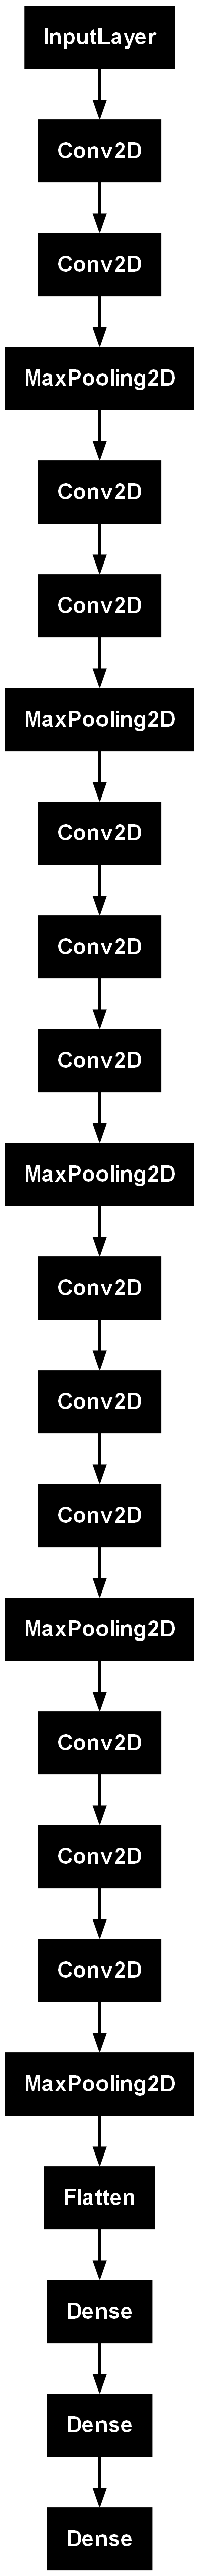

In [3]:
from tensorflow.keras.utils import plot_model

plot_model(vgg16)

ImagetNet 클래스 목록과 VGG16 실습용 이미지 4장을 다운받겠습니다.

In [4]:
import gdown, zipfile, os

if not os.path.isfile('VGG16_test.zip'):
    gdown.download(id='11LZAFSFVtDsdKdLcFR9E-MaDoar6C3R5', output='VGG16_test.zip')
    VGG16_test = zipfile.ZipFile('VGG16_test.zip')
    VGG16_test.extractall()
    VGG16_test.close()

Downloading...
From: https://drive.google.com/uc?id=11LZAFSFVtDsdKdLcFR9E-MaDoar6C3R5
To: c:\Users\USER\Desktop\인공지능 사관학교\ai\08_07_CNN_keras\VGG16_test.zip
100%|██████████| 338k/338k [00:00<00:00, 711kB/s]


imagenet_classes.txt에는 라벨에 대응하는 이름이 줄별로 나열되어 있습니다.  
`readlines()`는 각 줄에 있는 문자열을 읽어옵니다.  
`strip()`으로 마지막 줄바꿈 문자 `\n`를 없앱니다.

In [6]:
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

print(labels)
print(len(labels))

['tench, Tinca tinca', 'goldfish, Carassius auratus', 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 'tiger shark, Galeocerdo cuvieri', 'hammerhead, hammerhead shark', 'electric ray, crampfish, numbfish, torpedo', 'stingray', 'cock', 'hen', 'ostrich, Struthio camelus', 'brambling, Fringilla montifringilla', 'goldfinch, Carduelis carduelis', 'house finch, linnet, Carpodacus mexicanus', 'junco, snowbird', 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', 'robin, American robin, Turdus migratorius', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel, dipper', 'kite', 'bald eagle, American eagle, Haliaeetus leucocephalus', 'vulture', 'great grey owl, great gray owl, Strix nebulosa', 'European fire salamander, Salamandra salamandra', 'common newt, Triturus vulgaris', 'eft', 'spotted salamander, Ambystoma maculatum', 'axolotl, mud puppy, Ambystoma mexicanum', 'bullfrog, Rana catesbeiana', 'tree frog, tree-frog', 'tailed frog, bell toad, 

강아지 사진을 불러오겠습니다.

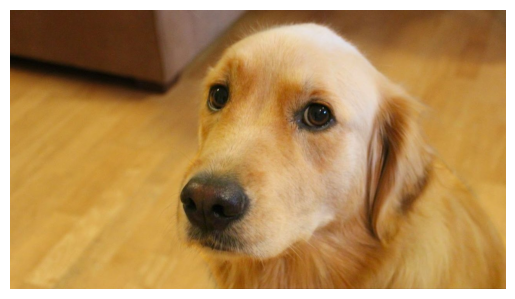

(720, 1280, 3)


In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as image

img = image.imread("golden.jpg")
plt.imshow(img)
plt.axis('off')
plt.show()
print(img.shape)

이미지의 해상도가 720 $\times$ 1280인데 VGG16의 입력해상도는 224 $\times$ 224입니다.  
[tf.image.resize](https://www.tensorflow.org/api_docs/python/tf/image/resize)를 이용해 VGG16의 입력해상도로 바꿔줍니다.  
[preprocess_input](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input) 메서드를 사용해서 채널별로 픽셀값들을 정규화하고 RGB를 GBR로 변환하는등의 VGG16에 맞는 데이터 전처리를 합니다.  
1,000차원 확률분포가 출력됩니다.

In [8]:
import tensorflow as tf
import numpy as np

img = tf.image.resize(img,(224,224))
out=vgg16(tf.keras.applications.vgg16.preprocess_input(tf.expand_dims(img,axis=0)))
print(out)

tf.Tensor(
[[9.51916740e-11 1.67444070e-09 4.54722593e-10 1.22139035e-10
  7.29339755e-10 6.12934592e-10 1.87835258e-09 1.88213223e-09
  1.21587074e-09 1.72723641e-10 1.59228776e-11 2.07725101e-10
  1.10474629e-10 6.00269001e-11 2.06619860e-10 1.46062780e-11
  6.06578112e-12 3.29297117e-10 5.52085287e-11 2.71906109e-10
  5.34171188e-12 1.71026512e-10 3.04061332e-10 7.54976914e-11
  1.19413729e-10 1.63873068e-10 5.98950403e-11 2.47947107e-10
  1.28503305e-10 5.11521714e-10 3.12366695e-11 1.80514370e-09
  6.80248802e-10 5.26044652e-10 3.95447536e-10 2.76799625e-11
  8.12548362e-11 5.51093199e-11 7.20306453e-11 8.15512310e-11
  5.27992705e-10 2.89606429e-11 1.56176502e-10 2.05284345e-09
  6.52890545e-12 3.74043053e-11 2.42940157e-09 6.58908275e-11
  8.66907435e-10 1.02749779e-11 6.81301848e-10 3.48400642e-10
  3.08998660e-10 1.23365401e-10 1.89780511e-10 1.42913326e-09
  6.22331284e-11 5.96254643e-11 6.82534515e-11 1.82375570e-09
  1.90404603e-09 1.20751387e-09 9.29036403e-10 3.96230493e-

개 정도가 아니라 골든 리트리버라는 품종을 94프로의 확신을 가지고 정확히 맞췄네요.  
나머지 넷도 개 품종입니다.

In [12]:
top_5 = np.argsort(-out[0])[:5]
for idx in top_5:
    print(f"{labels[idx]} : {out[0,idx]*100:.3f}%")

[207 160 176 219 213]
golden retriever : 94.428%
Afghan hound, Afghan : 4.389%
Saluki, gazelle hound : 0.521%
cocker spaniel, English cocker spaniel, cocker : 0.232%
Irish setter, red setter : 0.079%


중국 이화원의 불향각 사진을 불러오겠습니다.

(427, 640, 3)


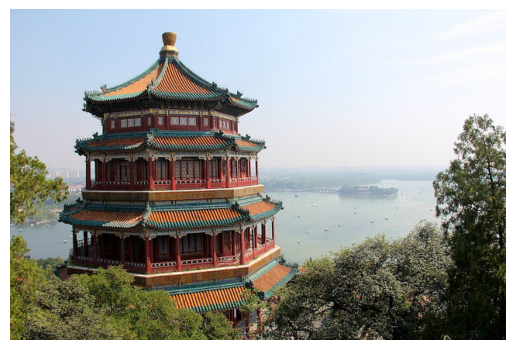

In [13]:
from sklearn.datasets import load_sample_image

img = load_sample_image('china.jpg')
print(img.shape)

plt.imshow(img)
plt.axis('off')
plt.show()

monastery는 수도원이고 stupa는 사리탑입니다.  
강때문에 boathouse라고 판단한듯합니다.

In [14]:
img = tf.image.resize(img,(224,224))
out=vgg16(tf.keras.applications.vgg16.preprocess_input(img[np.newaxis,:,:,:]))

top_5 = np.argsort(-out[0])[:5]
for idx in top_5:
    print(f"{labels[idx]} : {out[0,idx]*100:.4f}%")

monastery : 28.6342%
stupa, tope : 21.2258%
palace : 18.4324%
church, church building : 17.1889%
boathouse : 4.3878%


실습했던 데이지 사진을 불러오겠습니다.

(427, 640, 3)


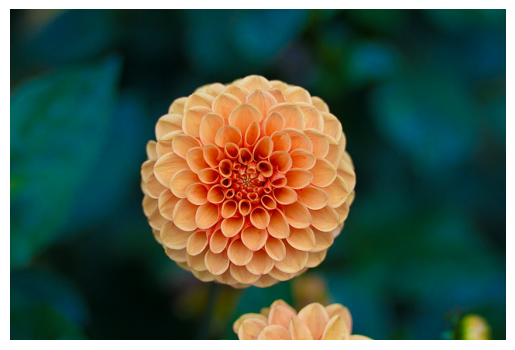

In [15]:
img = load_sample_image('flower.jpg')
print(img.shape)

plt.imshow(img)
plt.axis('off')
plt.show()

확신에 차지는 않았지만 데이지라는 꽃 품종을 정확히 맞췄습니다.  
그런데 2등이 뜬금없이 벌입니다.  
꽃 사진에 벌이 있는 경우가 많아서 그렇습니다.  
이렇게 데이터 기반의 인공지능은 예상치 못한 편향이 생길수 있습니다.  
![](https://drive.google.com/thumbnail?id=1cNlf35B7zT9QWxKYblcnpI7NGVkzoP2_&sz=s4000)

In [16]:
img = tf.image.resize(img,(224,224))
out=vgg16(tf.keras.applications.vgg16.preprocess_input(img[np.newaxis,:,:,:]))

top_5 = np.argsort(-out[0])[:5]
for idx in top_5:
    print(f"{labels[idx]} : {out[0,idx]*100:.4f}%")

daisy : 18.0349%
bee : 5.5377%
bell pepper : 5.2733%
zucchini, courgette : 4.4060%
coral fungus : 4.2526%


위에서 예측한 골든 리트리버도 20위까지 순위를 확장하면 적은 확률이긴 하지만 비슷한 편향을 확인할 수 있습니다.  
2개가 뜬금없이 테니스공과 목욕수건인데요.  
골든 리트리버 사진을 찍을 때 테니스공을 물고 있거나 목욕직후인 경우가 많아서 그렇습니다.  
![](https://drive.google.com/thumbnail?id=1DBu7ZAzo7Y4dKLIvljlofIgy-lVMjPnV&sz=s4000)

In [17]:
img = image.imread("golden.jpg")
img = tf.image.resize(img,(224,224))
out=vgg16(tf.keras.applications.vgg16.preprocess_input(tf.expand_dims(img,axis=0)))

top_20 = np.argsort(-out[0])[:20]
for idx in top_20:
    print(f"{labels[idx]} : {out[0,idx]*100:.3f}%")

golden retriever : 94.428%
Afghan hound, Afghan : 4.389%
Saluki, gazelle hound : 0.521%
cocker spaniel, English cocker spaniel, cocker : 0.232%
Irish setter, red setter : 0.079%
otterhound, otter hound : 0.067%
collie : 0.056%
Labrador retriever : 0.042%
redbone : 0.033%
bloodhound, sleuthhound : 0.024%
tennis ball : 0.016%
basset, basset hound : 0.013%
Shetland sheepdog, Shetland sheep dog, Shetland : 0.012%
English setter : 0.012%
flat-coated retriever : 0.012%
Sussex spaniel : 0.011%
bath towel : 0.010%
Gordon setter : 0.008%
Great Pyrenees : 0.005%
black-and-tan coonhound : 0.004%


**[실습1] (10분) (i) labrador.jpg를 출력하시오. VGG16이 예측하는 톱 5의 클래스 이름과 확률을 출력하시오.**

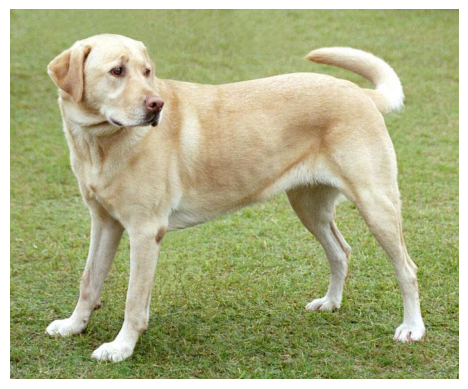

(577, 700, 3)
Labrador retriever : 41.079%
golden retriever : 16.162%
redbone : 4.517%
Chesapeake Bay retriever : 4.091%
kuvasz : 2.696%


In [25]:
labrador_img = image.imread("labrador.jpg")
plt.imshow(labrador_img)
plt.axis('off')
plt.show()
print(labrador_img.shape)

labrador_img = tf.image.resize(labrador_img,(224,224))
out=vgg16(tf.keras.applications.vgg16.preprocess_input(tf.expand_dims(labrador_img,axis=0)))
out=vgg16(tf.keras.applications.vgg16.preprocess_input(labrador_img[np.newaxis, :, :, :]))

top_5 = np.argsort(-out[0])[:5]
for idx in top_5:
    print(f"{labels[idx]} : {out[0,idx]*100:.3f}%")



 **(ii) strawberries.jpg를 출력하시오. VGG16이 예측하는 톱 5의 클래스 이름과 확률을 출력하시오.**

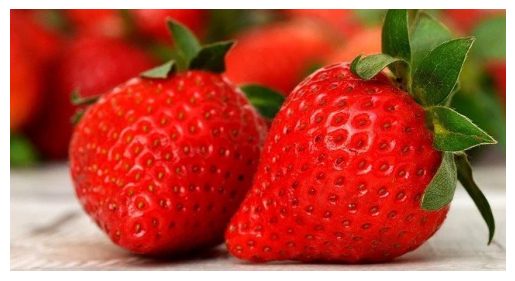

(338, 640, 3)
strawberry : 99.984%
banana : 0.004%
strainer : 0.003%
orange : 0.003%
pineapple, ananas : 0.002%


In [24]:
strawberries_img = image.imread("strawberries.jpg")
plt.imshow(strawberries_img)
plt.axis('off')
plt.show()
print(strawberries_img.shape)

strawberries_img = tf.image.resize(strawberries_img,(224,224))
out=vgg16(tf.keras.applications.vgg16.preprocess_input(tf.expand_dims(strawberries_img,axis=0)))

top_5 = np.argsort(-out[0])[:5]
for idx in top_5:
    print(f"{labels[idx]} : {out[0,idx]*100:.3f}%")

**(iii) car.jpg를 출력하시오. VGG16이 예측하는 톱 5의 클래스 이름과 확률을 출력하시오.**

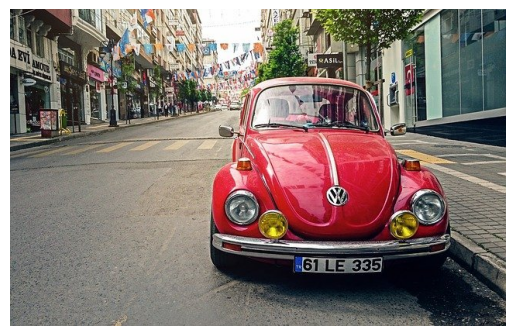

(409, 640, 3)
cab, hack, taxi, taxicab : 74.703%
streetcar, tram, tramcar, trolley, trolley car : 6.097%
sports car, sport car : 4.560%
go-kart : 1.546%
trolleybus, trolley coach, trackless trolley : 1.259%


In [26]:
car_img = image.imread("car.jpg")
plt.imshow(car_img)
plt.axis('off')
plt.show()
print(car_img.shape)

car_img = tf.image.resize(car_img,(224,224))
out=vgg16(tf.keras.applications.vgg16.preprocess_input(tf.expand_dims(car_img,axis=0)))

top_5 = np.argsort(-out[0])[:5]
for idx in top_5:
    print(f"{labels[idx]} : {out[0,idx]*100:.3f}%")

# 전이 학습 (transfer learning)

사람이 새로운 지식을 배울때는 과거의 지식 또는 경험이 중요한 역할을 하곤 합니다.  
바둑 고수는 체스를 빠르게 배울수 있고, 바이올린을 잘 켜는 사람은 피아노를 빠르게 배울수 있으며, 자전거를 자유자재로 타는 사람은 오토바이도 쉽게 탈 수 있습니다.  
![](https://drive.google.com/thumbnail?id=1kOtXudzp0_nRB_3N3aYKXotn7ZRzAlAG&sz=s4000)

---
적은 수의 데이터만 주어졌을 때 개와 고양이 이진분류 문제를 다시 도전하겠습니다.  
ImageNet으로 훈련된 VGG16모델을 사용하겠습니다.  
통상적으로 합성곱 신경망은 합성곱층 - relu층 - max pooling층 마디가 반복되다가 마지막에 fully connected layer가 등장합니다.  
합성곱 신경망에서 전자의 역할은 특성 추출이고 후자의 역할은 분류입니다.  
분류기 역할을 하는 마지막 3개의 fully connected layer를 잘라내겠습니다.  
남아 있는 층들의 파라미터에는 ImageNet이라는 방대한 이미지 데이터에서 얻은 사물들의 보편적인 시각적 특징들이 담겨있습니다.  
이들을 업데이트되지 않도록 동결합니다.  
동결하는 이유는 학습초기에는 흘러들어오는 그레디언트가 너무 크기 때문에 이로부터 섬세하게 조정된 파라미터를 보호하기 위해서입니다.
- `include_top=False` : 분류를 담당하는 마지막 fully connected layer들을 잘라냅니다. 디폴트는 True입니다.
- `input_shape=(180, 180, 3))` : 입력 해상도를 변경합니다. `include_top=False`일때만 가능합니다.
- `.trainable = False` : 파라미터 동결  
![](https://drive.google.com/thumbnail?id=13iLrbpdWd0D4v3YdV7ggzNh7rLJMZ2e7&sz=s4000)

In [27]:
conv_base = keras.applications.vgg16.VGG16(
    include_top=False,
    input_shape=(180, 180, 3))

conv_base.trainable = False

conv_base.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

디렉토리로부터 데이터를 읽어들여 `Dataset`을 만듭니다.

In [29]:
import pathlib
from tensorflow.keras.utils import image_dataset_from_directory

if not os.path.isdir('cats_vs_dogs_small'):
    gdown.download(id='1z2WPTBUI-_Q2jZtcRtQL0Vxigh-z6dyW', output='cats_vs_dogs_small.zip')
    cats_vs_dogs_small = zipfile.ZipFile('cats_vs_dogs_small.zip')
    cats_vs_dogs_small.extractall()
    cats_vs_dogs_small.close()

base_dir = pathlib.Path("cats_vs_dogs_small")

train_dataset = image_dataset_from_directory(
    "C:\\Users\\USER\\Desktop\\cats_vs_dogs_small\\train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    "C:\\Users\\USER\\Desktop\\cats_vs_dogs_small\\validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    "C:\\Users\\USER\\Desktop\\cats_vs_dogs_small\\test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


`keras.applications.vgg16.preprocess_input`으로 VGG16에 맞게 `Dataset`을 전처리합니다.  
VGG16에서 마지막 분류기를 잘라내고 남은 conv_base는 특성 추출기입니다.  
마지막 분류기를 새로 추가합니다.  
이진분류를 해야 하니 마지막층 뉴런은 하나이고 활성화함수는 시그모이드 함수입니다.

In [39]:
from keras.layers import Flatten, Dense, Dropout

inputs = keras.Input(shape=(180, 180, 3))
x = keras.applications.vgg16.preprocess_input(inputs)
x = conv_base(x) # vgg 16 그자체
x = Flatten()(x)
x = Dense(256)(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

특성추출기의 파라미터들을 모두 동결시켰기 때문에 새로 추가한 분류기만 학습이 됩니다.

In [72]:
import os
import tensorflow as tf 
from tensorflow.python.client import device_lib


In [73]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2158397931927965773
 xla_global_id: -1]

In [74]:
! nvidia-smi

Mon Aug 19 15:22:18 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.81                 Driver Version: 560.81         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650 Ti   WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   50C    P0             14W /   50W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")]

history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

ImageNet으로 훈련된 VGG16의 특성추출기는 그대로 사용하고 교체한 분류기만 새로 학습하여 높은 정확도 향상을 얻어냈습니다.  
ImageNet안에 이미 다수의 개와 고양이 사진이 있기 때문에 일반적인 상황에서도 효과가 좋을지 의심스러울 수 있습니다.  
하지만, 검색해보면 ImageNet으로 훈련된 VGGNet이나 ResNet으로부터 전이학습을 하여 암을 판별하는 모델도 확인할 수 있습니다.  
![](https://drive.google.com/thumbnail?id=1NBH2JwTEXMvX0IZR8-2Zg9B17twBgeYF&sz=s4000)

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

**[실습2] (5분) 특성추출기의 파라미터를 동결시키지 않고 10에폭동안 훈련시키시오.**

In [34]:
conv_base = keras.applications.vgg16.VGG16(
    include_top=False,
    input_shape=(180, 180, 3)
)

conv_base.trainable = True

inputs = keras.Input(shape=(180, 180, 3))
x = keras.applications.vgg16.preprocess_input(inputs)
x = conv_base(x)
x = Flatten()(x)
x = Dense(256)(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 180, 180,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_3          │ (None, 180, 180)  │          0 │ input_layer_4[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_4          │ (None, 180, 180)  │          0 │ input_layer_4[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_5          │ (None, 180, 180)  │          0 │ input_layer_4[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_1 (Stack)     │ (None, 180, 180,  │          0 │ get_item_3[0][0], │
│                     │ 3)                │            │ get_item_4[0][0], │
│                     │                   │            │ get_item_5[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 180, 180,  │          0 │ stack_1[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 5, 5, 512) │ 14,714,688 │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 12800)     │          0 │ vgg16[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 256)       │  3,277,056 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │        257 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 17,992,001 (68.63 MB)

 Trainable params: 17,992,001 (68.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(train_dataset,
          epochs=10,
          validation_data=validation_dataset)

# 증강 데이터 + 전이 학습

데이터 증강 층 → 파라미터가 동결된 VGG16의 특성 추출기 → 이진 분류기 순으로 신경망을 구성하겠습니다.

In [ ]:
from keras import layers

data_augmentation = keras.Sequential(
    [layers.RandomFlip("horizontal"),
     layers.RandomRotation(0.1),
     layers.RandomZoom(0.2)])

conv_base = keras.applications.vgg16.VGG16(
    include_top=False,
    input_shape=(180, 180, 3))
conv_base.trainable = False

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = Flatten()(x)
x = Dense(256)(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.h5",
        save_best_only=True,
        monitor="val_loss")]

history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

학습할때마다 다르지만 대체로 약간의 성능향상이 있습니다.

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

# 미세 조정 (fine tuning)

새로운 분류기의 학습이 끝나고 나면 그 다음부터 흘러들어오는 그레디언트는 크기가 작아서 동결을 풀어도 됩니다.  
단, 특성추출기의 하위층은 보편적인 로컬한 특성을 인코딩하고 상위층은 특화된 글로벌한 특성을 인코딩하기 때문에 상위층만 동결을 풉니다.  
다시 학습을 시작하면 파라미터들이 미세하게 재조정됩니다.  
![](https://drive.google.com/thumbnail?id=1_1G2e4yni88eDrzEAq1s1V84bsu6Cp55&sz=s4000)

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

print("동결 해제층 :")
for layer in conv_base.layers:
    if layer.trainable:
        print(layer.name)

print("\n")
conv_base.summary()

미세조정 단계이기 때문에 RMSprop의 학습률을 $10^{-5}$으로 작게 잡습니다.

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

학습할때마다 다르지만 대체로 약간의 성능향상이 있습니다.

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

신경망이 틀리게 대답한 고양이 이미지의 인덱스와 개수입니다.

In [ ]:
errors_cat = []
for i in range(1000):
    image_path = f'./cats_vs_dogs_small/test/cat/cat.{1500+i}.jpg'
    img = plt.imread(image_path)
    img = tf.image.resize(img,(180,180))
    img = tf.expand_dims(img,axis=0)
    if model(img)[0]>0.5:
        errors_cat.append(i)

print(errors_cat)
print(len(errors_cat))

신경망이 틀리게 대답한 고양이 이미지입니다.

In [ ]:
import math

plt.figure(figsize=(16, 4*math.ceil(len(errors_cat)/4)))
for i in range(len(errors_cat)):
    plt.subplot(math.ceil(len(errors_cat)/4),4,i+1)
    image_path = f'./cats_vs_dogs_small/test/cat/cat.{1500+errors_cat[i]}.jpg'
    image = plt.imread(image_path)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
plt.show()

**[실습3] (5분) (i) 신경망이 틀리게 대답한 강아지 이미지의 인덱스와 개수를 출력하시오.**

In [ ]:
errors_dog = []
for i in range(1000):
    image_path = f'./cats_vs_dogs_small/test/dog/dog.{1500+i}.jpg'
    img = plt.imread(image_path)
    img = tf.image.resize(img,(180,180))
    img = tf.expand_dims(img,axis=0)
    if model(img)[0]>0.5:
        errors_dog.append(i)

print(errors_dog)
print(len(errors_dog))

**(ii) 신경망이 틀리게 대답한 강아지 이미지들을 모아찍기로 출력하시오.**

In [ ]:
import math

plt.figure(figsize=(16, 4*math.ceil(len(errors_dog)/4)))
for i in range(len(errors_dog)):
    plt.subplot(math.ceil(len(errors_dog)/4),4,i+1)
    image_path = f'./cats_vs_dogs_small/test/dog/dog.{1500+errors_dog[i]}.jpg'
    image = plt.imread(image_path)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [44]:
from tensorflow import keras
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images[10000:]
train_labels = train_labels[10000:]
val_images = train_images[:10000]
val_labels = train_labels[:10000]
# train_images = train_images.astype('float32') / 255
# test_images = test_images.astype('float32') / 255


print(train_images.shape)

(40000, 32, 32, 3)


In [45]:
import numpy as np
import matplotlib.pyplot as plt

#augmentation이 적용된 image들을 시각화 해주는 함수
def show_aug_image_batch(image, generator, n_images=4):

    # ImageDataGenerator는 여러개의 image를 입력으로 받기 때문에 4차원으로 입력 해야함.
    image_batch = np.expand_dims(image, axis=0)

    # featurewise_center or featurewise_std_normalization or zca_whitening 가 True일때만 fit 해주어야함
    # generator.fit(image_batch)
    # flow로 image batch를 generator에 넣어주어야함.
    data_gen_iter = generator.flow(image_batch)

    fig, axs = plt.subplots(nrows=1, ncols=n_images, figsize=(24, 8))

    for i in range(n_images):
    	#generator에 batch size 만큼 augmentation 적용(매번 적용이 다름)
        aug_image_batch = next(data_gen_iter)
        aug_image = np.squeeze(aug_image_batch)
        aug_image = aug_image.astype('int')
        axs[i].imshow(aug_image)
        axs[i].axis('off')

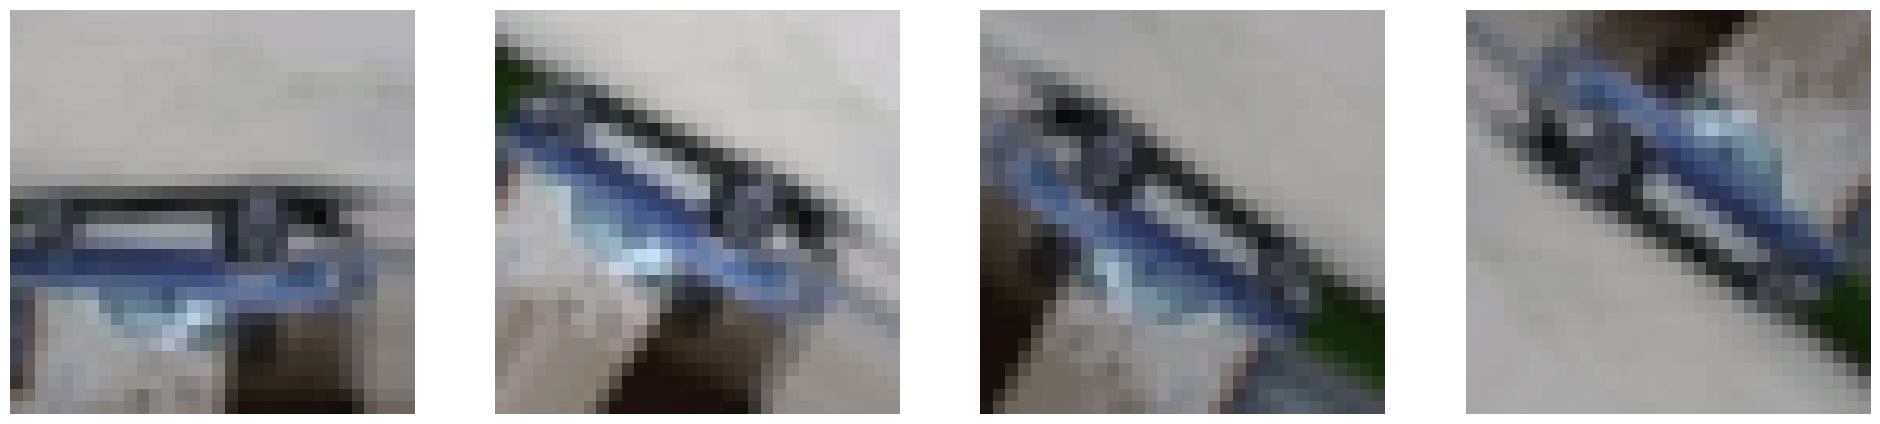

In [71]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(
    rotation_range=45,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=(0.7, 1.2),
    width_shift_range=0.1,
    height_shift_range=0.1,
    # rescale=1/255.0,
)

show_aug_image_batch(train_images[0], data_generator, n_images=4)

In [23]:
# vgg16 가져오기

vgg16 = keras.applications.vgg16.VGG16(
    include_top=False,
    input_shape=(32, 32, 3)
)

vgg16.trainable = True

vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# 모델 생성
from keras.layers import Flatten, Dense, Dropout

inputs = keras.Input(shape=(32, 32, 3))
x = keras.applications.vgg16.preprocess_input(inputs)
x = vgg16(x)
x = Flatten()(x)
x = Dense(256)(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = Dropout(0.3)(x)
outputs = Dense(10, activation='softmax')(x)

model = keras.Model(inputs, outputs)

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_6          │ (None, 32, 32)    │          0 │ input_layer_5[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_7          │ (None, 32, 32)    │          0 │ input_layer_5[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_8          │ (None, 32, 32)    │          0 │ input_layer_5[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_2 (Stack)     │ (None, 32, 32, 3) │          0 │ get_item_6[0][0], │
│                     │                   │            │ get_item_7[0][0], │
│                     │                   │            │ get_item_8[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 32, 32, 3) │          0 │ stack_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 1, 1, 512) │ 14,714,688 │ add_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 512)       │          0 │ vgg16[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 256)       │    131,328 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 256)       │          0 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 128)       │     32,896 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 128)       │          0 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 10)        │      1,290 │ dropout_5[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,880,202 (56.76 MB)

 Trainable params: 14,880,202 (56.76 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=5)

train_gen = data_generator.flow(train_images, train_labels)

history = model.fit(train_gen,
          epochs=50,
          batch_size=32,
          callbacks=early_stopping,
          validation_data=(val_images, val_labels))

Epoch 1/50


c:\Users\USER\miniconda3\envs\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


   9/1250 ━━━━━━━━━━━━━━━━━━━━ 10:29 507ms/step - accuracy: 0.0952 - loss: 2.3028

KeyboardInterrupt: 